### Github repository: https://github.com/jmlarios/AI-MACHINE-LEARNING-FOUNDATIONS

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('hour.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Loading and Initial Exploration

In [53]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [55]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Checking Skewness

The target variable cnt is skewed towards the right. This indicates a concentration of low rental counts with fewer high-rental peaks. 

I consulted with ChatGPT in order to see if perharps a normalization or standarization should be made to the target variable in order to ensure model performance and found out that this would be necessary for linear models as it told me the following: "To reduce skewness and improve modeling performance — particularly for linear models — a log transformation (log1p) can be applied. Tree-based models are robust to this skew, but transforming the target can still help stabilize variance and residuals."

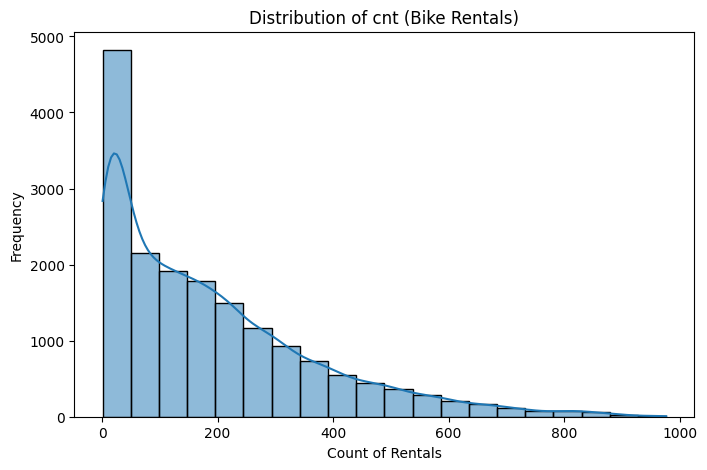

Skewness of cnt: 1.2773013463494975


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

cnt_skew = skew(df['cnt'])
cnt_skew

plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], bins=20, kde=True)
plt.title("Distribution of cnt (Bike Rentals)")
plt.xlabel("Count of Rentals")
plt.ylabel("Frequency")
plt.show()

print("Skewness of cnt:", cnt_skew)


Following the recommendation from before, a log transformation will be applied to the target variable which will be stored in a new column and will be used as the target only for the Linear Regression model.

In [57]:
import numpy as np
df['log_cnt'] = np.log1p(df['cnt'])


#### Checking Correlations/Collinearity

A correlation matrix was used to check the relationship between the target variable and the for now existing features. The results of the matrix and the dropped columns along with the reasoning falls below.

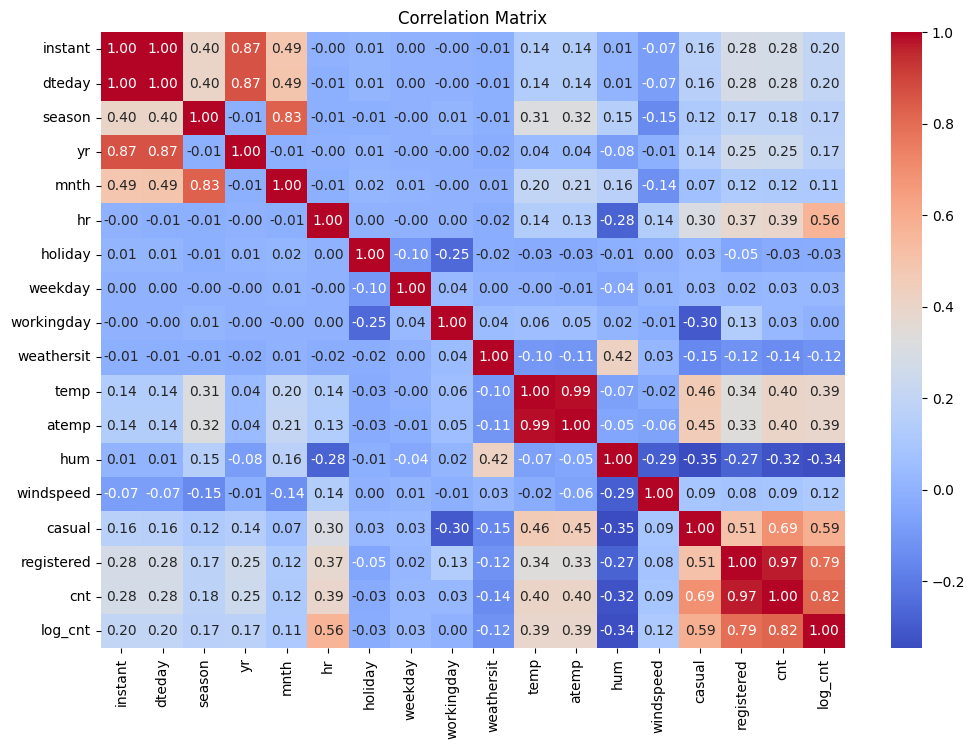

In [58]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [59]:
# Compute correlations with cnt
correlations = df[['registered', 'casual', 'temp', 'atemp', 'hr', 'cnt']].corr()

# Display correlation values
print(correlations['cnt'].sort_values(ascending=False))


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
Name: cnt, dtype: float64


The target variable 'cnt' has a high correlation with the features 'registered and 'casual', which means they are direct predictors of the target variable and therefore must be dropped to avoid data leakage.

From the correlation matrix we can also observe a correlation of 0.99 between 'temp' and 'atemp' and we really only need one of them, especially to avoid redundance since the data is very similar if not the same, therefore 'atemp' will be dropped as well.

Lastly, there is a high correlation between 'instant' and 'dteday'. The 'instant' column is just an index which is not needed and the 'dteday' column is already represented in the features 'yr', 'mnth', 'weekday' and 'hr', so once again redundant data that will be dropped.

The columns to be dropped then are 'instant', 'dteday', 'casual', 'registered' and 'atemp'.

In [60]:
#Drop non-useful / leaky columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'atemp'])
